<a href="https://colab.research.google.com/github/RagaaM/Scriba/blob/main/VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
train_path="/content/drive/MyDrive/dataset"
test_path="/content/drive/MyDrive/dataset"
val_path="/content/drive/MyDrive/dataset"

In [3]:
x_train=[]

for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_train.append(img_arr)

x_test=[]

for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_test.append(img_arr)

x_val=[]

for folder in os.listdir(val_path):

    sub_path=val_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_val.append(img_arr)

In [4]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

In [5]:
#divided 255 for normalization.
train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')

Found 80 images belonging to 4 classes.
Found 80 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [8]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [9]:
training_set.class_indices

{'.ipynb_checkpoints': 0, 'test': 1, 'train': 2, 'val': 3}

In [10]:
train_y.shape,test_y.shape,val_y.shape

((80,), (80,), (80,))

In [11]:
#vgg = VGG19(input_shape =(224,224,3), weights='imagenet', include_top=False)
IMAGE_SIZE = [224, 224]
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [12]:
#do not train the pre-trained layers of VGG-19
for layer in vgg.layers:
    layer.trainable = False

In [13]:
x = Flatten()(vgg.output)

In [14]:
#adding output layer.Softmax classifier is used as it is multi-class classification
prediction = Dense(4, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

In [15]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [16]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [17]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model

In [18]:
# fit the model
history = model.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=10,
  callbacks=[early_stop],
  batch_size=32,shuffle=True)

Epoch 1/10
3/3 [==============================] - 105s 42s/step - loss: 1.3989 - accuracy: 0.5500 - val_loss: 1.0052 - val_accuracy: 0.6625
Epoch 2/10
3/3 [==============================] - 103s 41s/step - loss: 1.0608 - accuracy: 0.6125 - val_loss: 0.7644 - val_accuracy: 0.6625
Epoch 3/10
3/3 [==============================] - 102s 41s/step - loss: 0.8711 - accuracy: 0.6500 - val_loss: 1.1003 - val_accuracy: 0.6000
Epoch 4/10
3/3 [==============================] - 103s 41s/step - loss: 0.9793 - accuracy: 0.6375 - val_loss: 0.8183 - val_accuracy: 0.7375
Epoch 5/10
3/3 [==============================] - 102s 41s/step - loss: 0.7485 - accuracy: 0.7500 - val_loss: 0.7287 - val_accuracy: 0.6000
Epoch 6/10
3/3 [==============================] - 103s 41s/step - loss: 0.8222 - accuracy: 0.6000 - val_loss: 0.5607 - val_accuracy: 0.7375
Epoch 7/10
3/3 [==============================] - 102s 41s/step - loss: 0.6911 - accuracy: 0.6625 - val_loss: 0.5279 - val_accuracy: 0.9250
Epoch 8/10
3/3 [====

In [19]:
model.evaluate(test_x,test_y,batch_size=32)

3/3 [==============================] - 52s 15s/step - loss: 0.3702 - accuracy: 0.9375


[0.37015852332115173, 0.9375]

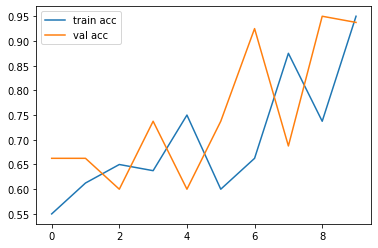

In [20]:
# accuracies

plt.plot(history.history['accuracy'], label='train acc')

plt.plot(history.history['val_accuracy'], label='val acc')

plt.legend()

plt.savefig('vgg-acc-rps-1.png')

plt.show()

In [21]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np
#predict
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)
#get classification report
print(classification_report(y_pred,test_y))
#get confusion matrix
print(confusion_matrix(y_pred,test_y))

              precision    recall  f1-score   support

           1       1.00      0.95      0.98        21
           2       1.00      0.92      0.96        52
           3       0.58      1.00      0.74         7

    accuracy                           0.94        80
   macro avg       0.86      0.96      0.89        80
weighted avg       0.96      0.94      0.94        80

[[20  0  1]
 [ 0 48  4]
 [ 0  0  7]]
